In [46]:
import niscope as ni
import matplotlib.pyplot as plt
import numpy as np
import Card_Class
 # 250 MHz MAX



#RICORDARSI DEL NOME!!!!!
with ni.Session("Pippo") as session: # Name of the device
    session.channels[0].configure_vertical(range=1.0, coupling=ni.VerticalCoupling.AC)
    session.channels[1].configure_vertical(range=4.0, coupling=ni.VerticalCoupling.DC)
    session.channels[2].configure_vertical(range=4.0, coupling=ni.VerticalCoupling.DC)
    session.configure_horizontal_timing(min_sample_rate=50000000, min_num_pts=800, ref_position=50.0, num_records=2, enforce_realtime=True)
    '''
    min_sample_rate:        Boh
    min_num_pts:            Number of points in the record
    ref_position:
    num records:            The number of records to acquire
    enforce_realtime:
    '''
    with session.initiate():
        waveforms = session.channels[0,1].fetch()
    for wfm in waveforms:
        print('Channel {0}, record {1} samples acquired: {2:,}\n'.format(wfm.channel, wfm.record, len(wfm.samples)))

print(waveforms)

Channel 0, record 0 samples acquired: 800

Channel 1, record 0 samples acquired: 800

Channel 0, record 1 samples acquired: 800

Channel 1, record 1 samples acquired: 800

[WaveformInfo(absolute_initial_x=4555.446582804, relative_initial_x=-7.996000000000001e-06, x_increment=2e-08, offset=0.0, gain=1.0), WaveformInfo(absolute_initial_x=4555.446582804, relative_initial_x=-7.996000000000001e-06, x_increment=2e-08, offset=0.0, gain=1.0), WaveformInfo(absolute_initial_x=4555.446598884, relative_initial_x=-7.996000000000001e-06, x_increment=2e-08, offset=0.0, gain=1.0), WaveformInfo(absolute_initial_x=4555.446598884, relative_initial_x=-7.996000000000001e-06, x_increment=2e-08, offset=0.0, gain=1.0)]


In [6]:
waveforms[1].samples                            # puntatore

In [7]:
wfm.samples.tolist()  # ok, ma quale dei 6 sample é??? DA CAPIRE!!!

[0.002374848299950827,
 0.002723785728449002,
 0.002723785728449002,
 0.003072723156947177,
 0.002025910871452652,
 0.001328036014456302,
 0.002374848299950827,
 0.002374848299950827,
 0.003072723156947177,
 0.002025910871452652,
 0.001676973442954477,
 0.003072723156947177,
 0.002025910871452652,
 0.002723785728449002,
 0.002723785728449002,
 0.002374848299950827,
 0.001676973442954477,
 0.002025910871452652,
 0.004119535442441702,
 0.003072723156947177,
 0.002025910871452652,
 0.001676973442954477,
 0.002025910871452652,
 0.002025910871452652,
 0.002025910871452652,
 0.001676973442954477,
 0.002374848299950827,
 0.002374848299950827,
 0.002374848299950827,
 0.003072723156947177,
 0.002374848299950827,
 0.003421660585445352,
 0.002723785728449002,
 0.002723785728449002,
 0.002374848299950827,
 0.003770598013943527,
 0.002025910871452652,
 0.002723785728449002,
 0.002374848299950827,
 0.003072723156947177,
 0.003770598013943527,
 0.002025910871452652,
 0.002374848299950827,
 0.00272378

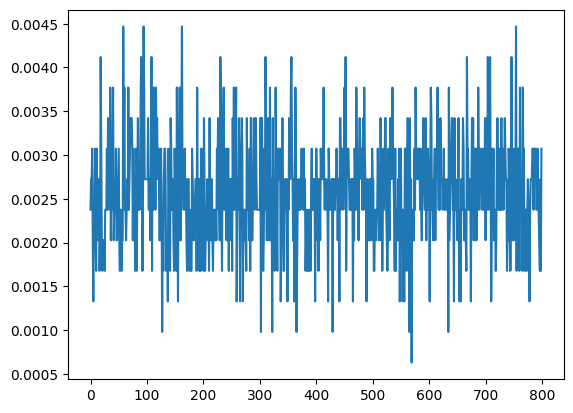

In [8]:
import matplotlib.pyplot as plt

a = wfm.samples.tolist()                            # lista dei punti presi

plt.plot(a)

Channel 0, record 0 samples acquired: 1,000

Channel 0, record 1 samples acquired: 1,000

Channel 0, record 2 samples acquired: 1,000



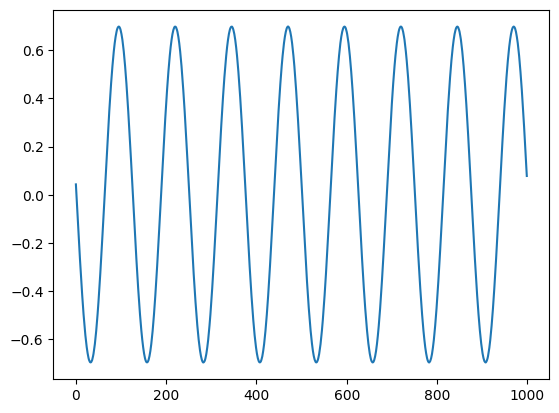

In [55]:
voltage_range = 2 # MAX 5V
n_pts = 1000
n_recs = 3

with ni.Session("Pippo") as session: # Name of the device
    session.channels[0].configure_vertical(range = voltage_range, coupling=ni.VerticalCoupling.AC)
    session.configure_horizontal_timing(min_sample_rate = 250e6, min_num_pts = n_pts, ref_position = 50.0, num_records = n_recs, enforce_realtime = True)
    with session.initiate(): # After calling this method, the digitizer leaves the Idle state and waits for a trigger
        waveforms = session.channels[0].fetch()
    for wfm in waveforms:
         print('Channel {0}, record {1} samples acquired: {2:,}\n'.format(wfm.channel, wfm.record, len(wfm.samples)))

a = waveforms[0].samples.tolist()

plt.plot(a)
